<br>
<font>
<div dir="ltr" align="center">
    <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width="150" height="150">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Linear Algebra <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        DR Rabiee - DR Ramezani <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Engineering Department <br>
    </font>
    <font color="#1ABC9C" size="5" style="font-family:Arial, sans-serif;">
        Fall 2024 <br>
    </font>
    <font color="#16A085" size="5" style="font-family:Arial, sans-serif;">
        Practical Assignment 0 <br>
    </font>
    <font color="#7F8C8D" size="4" style="font-family:Arial, sans-serif;">
         Ali Najar - Armin Khosravi
    </font>
</div>


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Convolution
    </font>
</h1>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        In this assignment, we will explore the application of both 1D and 2D convolution in machine learning. Convolution is a fundamental operation used in a wide range of fields, including medical imaging, stock price prediction and trading, speech processing, and image recognition. It plays a crucial role in extracting meaningful patterns and features from data, making it essential for many machine learning tasks.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        Students will begin by implementing 1D convolution using different methods and comparing their speed. Then, they will apply 1D convolution to stock price prediction, learning how to analyze time-series data effectively.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        Afterward, the focus will shift to 2D convolution, where students will explore its application in feature extraction from images, gaining insight into how convolutional filters detect patterns such as edges and textures.
    </font>
</p>


In [1]:
! pip install yfinance

In [2]:
#import your libraries here

import numpy as np
import timeit
import datetime as dt

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense, BatchNormalization, Bidirectional

from scipy.fft import fft2, ifft2, fftshift

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        1D Convolution
    </font>
</h1>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        1D convolution is a powerful technique widely used in machine learning, particularly in the analysis of sequential data like time-series signals, speech, and even stock prices. At its core, 1D convolution works by sliding a filter or kernel over a sequence of data points to detect patterns, extract features, or smooth the data. Unlike 2D convolution, which operates on grids (such as images), 1D convolution works on one-dimensional sequences, making it well-suited for problems where data is ordered in time or space.
    </font>
</p>

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 1D Convolution Works
    </font>
</h2>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        The basic idea of 1D convolution involves applying a kernel to a sequence of values. The kernel slides over the input sequence, performing element-wise multiplications followed by a sum. This produces a new sequence that highlights certain features based on the kernel used. For example, in time-series analysis, different kernels can detect trends, seasonal patterns, or sharp changes in the data.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        The result of 1D convolution is a feature map, which is another sequence that represents important aspects of the input sequence. Depending on the choice of kernel, stride (the step size at which the kernel moves), and padding (how edges of the sequence are handled), 1D convolution can either downsample or retain the size of the original sequence.
    </font>
</p>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        There are various approaches to implementing 1D convolution, each with its own trade-offs in terms of computational efficiency and feature extraction. These approaches can be adapted to suit specific tasks and data characteristics.
    </font>
</p>

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 1D Convolution
    </font>
</h2>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        1D convolution is applied in a variety of fields, making it a versatile tool in machine learning:
    </font>
</p>

<ul style="direction: ltr; font-family: Arial, sans-serif; font-size: medium;">
    <li>
        <font face="Arial" size="3">
            <strong>Stock Price Prediction:</strong> 1D convolution is used to analyze historical price data and detect patterns such as upward or downward trends. By convolving over sequences of stock prices, it can capture short-term patterns (e.g., daily fluctuations) or long-term trends (e.g., month-to-month performance). Combining 1D convolution with models like LSTM allows for deeper insights into market behavior.
        </font>
    </li>
    <li>
        <font face="Arial" size="3">
            <strong>Speech Processing:</strong> In speech recognition and emotion detection, 1D convolution is used to process raw audio signals. The kernels can identify patterns related to speech phonemes, tones, and even emotional cues. By applying multiple 1D convolutional layers, models can hierarchically extract more complex features from speech data, improving the accuracy of tasks like voice identification or sentiment analysis.
        </font>
    </li>
    <li>
        <font face="Arial" size="3">
            <strong>Time-Series Analysis:</strong> 1D convolution is essential in analyzing time-series data from various domains, including healthcare (e.g., analyzing heart rate variability), industrial monitoring (e.g., detecting anomalies in sensor data), and environmental science (e.g., analyzing weather patterns). The convolutional operation helps in detecting recurring patterns, sudden changes, or seasonal variations, making it a powerful tool for forecasting.
        </font>
    </li>
    <li>
        <font face="Arial" size="3">
            <strong>Text Processing:</strong> Although less common, 1D convolution can also be applied to text data. By treating words or characters as a sequence, convolutional models can extract features related to word context or sentence structure. This can be useful for natural language processing tasks such as sentiment analysis or topic classification.
        </font>
    </li>
</ul>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        For understanding the mathematics behind 1D convolution, I recommend watching this <a href="https://www.youtube.com/watch?v=KuXjwB4LzSA&t=443s" target="_blank" style="color:#007acc;">YouTube video</a>.
    </font>
</p>


In [3]:
# Function to perform 1D convolution using two loops (slow but intuitive)
#complete this function
def convolve_1d_two_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using two loops.

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result.
    """

    signal_len = len(signal)
    kernel_len = len(kernel)
    pad_size = kernel_len - 1
    # Step 1: Zero-pad the signal on both sides to handle edge cases
    padded_signal = np.concatenate((np.zeros(pad_size),np.concatenate((signal,np.zeros(pad_size)))))
    # Step 2: Reverse the kernel for the convolution operation
    reversed_kernel = kernel[::-1]
    # Step 3: Perform convolution by sliding the kernel across the padded signal using two loops
    output_len = signal_len + kernel_len - 1
    output = np.zeros(output_len)
    for i in range(output_len):
      for k in range(kernel_len):
        if i+k < output_len:
          output[i]+=reversed_kernel[k]*padded_signal[i+k]
    return output

In [4]:
# Function to perform 1D convolution using one loop (optimized)
#Complete this function
def convolve_1d_one_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using a single loop (optimized version).

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)
    pad_size = kernel_len - 1

    # Step 1: Zero-pad the signal on both sides
    padded_signal = np.concatenate((np.zeros(pad_size),np.concatenate((signal,np.zeros(pad_size)))))

    # Step 2: Reverse the kernel for convolution
    reversed_kernel = kernel[::-1]

    output_len = signal_len + kernel_len - 1
    output = np.zeros(output_len)

    # Step 3: Perform convolution using a single loop and vectorized operations like sum
    for i in range(output_len):
      output[i] = np.sum(padded_signal[i:i+kernel_len]*reversed_kernel)
    return output

signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

result = convolve_1d_one_loops(signal, kernel)
print(result)

[ 1.  2.  2.  2.  2. -4. -5.]


In [5]:
# Function to perform 1D convolution using np.dot for speed improvement
def convolve_1d_dot(signal, kernel):
    """
    Convolve a 1D signal with a kernel using np.dot (fast and vectorized).

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)
    pad_size = kernel_len - 1

    # Step 1: Zero-pad the signal
    padded_signal = np.concatenate((np.zeros(pad_size),np.concatenate((signal,np.zeros(pad_size)))))

    # Step 2: Reverse the kernel
    reversed_kernel = kernel[::-1]

    output_len = signal_len + kernel_len - 1
    output = np.zeros(output_len)
    # Step 3: Perform vectorized convolution using dot product
    for i in range(output_len):
      output[i]=np.dot(padded_signal[i:i+kernel_len],reversed_kernel)
    return output
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

result = convolve_1d_dot(signal, kernel)
print(result)

[ 1.  2.  2.  2.  2. -4. -5.]


In [6]:
# Function to perform 1D convolution using Fast Fourier Transform (FFT)
# You are free to use np.fft.fft and np.fft.ifft
def fft_convolve_vectorized(signal, kernel):
    """
    Convolve a 1D signal with a kernel using Fast Fourier Transform (FFT).

    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.

    Returns:
        output: 1D array representing the convolution result using FFT.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)

    # Step 1: Zero-pad both the signal and kernel to the convolution length
    conv_len = signal_len + kernel_len-1
    padded_signal = np.pad(signal,(0, conv_len - signal_len))
    padded_kernel = np.pad(kernel,(0, conv_len - kernel_len))
    # Step 2: Perform FFT on both padded signal and kernel
    signal_fft = np.fft.fft(padded_signal)
    kernel_fft = np.fft.fft(padded_kernel)

    # Step 3: Element-wise multiplication in the frequency domain
    result_fft = signal_fft * kernel_fft

    # Step 4: Perform inverse FFT to get the result in the time domain
    result = np.fft.ifft(result_fft)

    # Step 5: Return the real part of the result to remove small imaginary parts
    return np.real(result)

# Example usage
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

fft_result = fft_convolve_vectorized(signal, kernel)
print(fft_result)

[ 1.  2.  2.  2.  2. -4. -5.]


In [7]:
# Sanity check to verify that the functions return similar results
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

print("Sanity Check: Comparing Results")
print("Two loops:", convolve_1d_two_loops(signal, kernel))
print("One loop:", convolve_1d_one_loops(signal, kernel))
print("Dot product:", convolve_1d_dot(signal, kernel))
print("FFT vectorized:", fft_convolve_vectorized(signal, kernel))
print("numpy function:", np.convolve(signal, kernel))



Sanity Check: Comparing Results
Two loops: [ 1.  2.  2.  2.  2. -4. -5.]
One loop: [ 1.  2.  2.  2.  2. -4. -5.]
Dot product: [ 1.  2.  2.  2.  2. -4. -5.]
FFT vectorized: [ 1.  2.  2.  2.  2. -4. -5.]
numpy function: [ 1  2  2  2  2 -4 -5]


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

<p style="direction: ltr; text-align: justify; line-height: 1.6; font-family: Arial, sans-serif; font-size: medium;">
    <font face="Arial" size="3">
        In this section, we will explore the features that different kernels are designed to extract. For each kernel provided, identify what type of feature or pattern the kernel is trying to detect in a sequence.
    </font>
</p>

#### **1. Kernel: `[1, -1]`**

**Answer:**

*Detects changes in the signal sequence*

---

#### **2. Kernel: `[1, 1, 1]`**

**Answer:**

*Smooths out sharp changes and noises*

---

#### **3. Kernel: `[0.25, 0.25, 0.25, 0.25]`**

**Answer:**

*Performs smoothing, just like the [1, 1, 1] kernel, but it does so in a more refined way by averaging the values over a wider window.*

---

#### **4. Kernel: `[-1, 2, -1]`**

**Answer:**

*Shows peaks (local maxima) and valleys (local minima) in a signal. It works like a second derivative in calculus, which helps to find points where the signal changes direction.*

---

#### **5. Kernel: `[1, 0, -1]`**

**Answer:**

*Shows changes between adjacent values by subtracting the value on the left from the value on the right.  It acts as a first derivative operator, highlighting where the signal has a positive slope (rising edge) or a negative slope (falling edge).*


In [8]:
# Function to measure average time for a number of iterations
def benchmark_convolution(signal_len, kernel_len, iterations):
    """
    Measure the average execution time of different convolution methods over a number of iterations.

    Args:
        signal_len: Length of the random input signal.
        kernel_len: Length of the random kernel.
        iterations: Number of times each method should be run to average the time.

    Returns:
        Tuple of average times for each method.
    """
    # Generate random signal and kernel for benchmarking
    np.random.seed(42)  # For reproducibility
    random_signal = np.random.rand(signal_len)
    random_kernel = np.random.rand(kernel_len)

    # Measure the average execution time for each method
    # you can use timeit
    time_two_loops = timeit.timeit(lambda: convolve_1d_two_loops(random_signal, random_kernel), number=iterations)
    time_one_loop = timeit.timeit(lambda: convolve_1d_one_loops(random_signal, random_kernel), number=iterations)
    time_dot = timeit.timeit(lambda: convolve_1d_dot(random_signal, random_kernel), number=iterations)
    time_fft = timeit.timeit(lambda: fft_convolve_vectorized(random_signal, random_kernel), number=iterations)
    time_np_convolve = timeit.timeit(lambda: np.convolve(random_signal, random_kernel), number=iterations)


    return (time_two_loops, time_one_loop, time_dot, time_fft, time_np_convolve)

# Input the number of iterations
num_iterations = 1000

# Run benchmark and print results
signal_len = 50
kernel_len = 20
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")


Average times over 1000 iterations (in seconds):
Two loops: 0.6862131649999981
One loop: 0.548333815999996
Dot product: 0.21748159099999498
FFT vectorized: 0.08076251800000023
NumPy convolve: 0.005696824000011702


In [9]:
# Run benchmark and print results for larger signal and kernel
signal_len = 100
kernel_len = 40
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")


Average times over 1000 iterations (in seconds):
Two loops: 3.7497113640000066
One loop: 0.5678592910000191
Dot product: 0.24093334799999866
FFT vectorized: 0.07758359100000689
NumPy convolve: 0.004268209999992223


In [10]:
# Run benchmark and print results for smaller signal and kernel
signal_len = 15
kernel_len = 3
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")


Average times over 1000 iterations (in seconds):
Two loops: 0.03452415399999609
One loop: 0.09121503899999084
Dot product: 0.025449420000001055
FFT vectorized: 0.04082881799999427
NumPy convolve: 0.001862027000015587


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

#### **1. Performance Comparison of Convolution Methods**

After running the convolution methods, compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm used by each method.

**Answer:**

*As expected the approach with two loops is the slowest and the fastest rank belongs to NumPy convolve function. The Reason behind the higher speed of NumPy function is that it uses highly optimized C code. This minimizes Python-level overhead when executing directly at the C level. Moreover NumPy uses vectorized operations, meaning it performs computations on entire arrays at once, without the need for explicit Python loops. It also leverages optimized libraries like BLAS and LAPACK for performance.*

---

#### **2. FFT Convolution Time Complexity**

You may have noticed that the FFT-based convolution is much faster than the others for longer signals. Can you describe the time complexity of the FFT convolution? Why is this method more efficient for larger input sizes?

**Answer:**

*FFT-based convolution is faster for large signals because it has a time complexity of O(N log N) compared to the quadratic O(N.M) complexity of direct convolution. By converting signals to the frequency domain, convolution turns into simple multiplication, which is much more efficient for larger inputs. The overhead of the FFT is small relative to the gains for long signals, making this method ideal for large-scale convolutions.*

---

#### **3. Scaling with Signal Length and Kernel Length**

Try changing the values of `signal_len` and `kernel_len` (e.g., doubling both lengths). Is the relative performance of the methods (speed comparison) the same as before? Which methods are most affected by changes in the size of the signal or kernel?

**Answer:**

*The loop Methods are effected the most. Dot product method also slows down since it also uses loop. As discussed in question 2, FFT-based convolution scales better with large input sizes, making it the least affected by signal/kernel length growth. NumPy convolve remains efficient, but its advantage decreases slightly with very large inputs compared to FFT-based methods.*

---

#### **4. Optimal Use Case for FFT Convolution**

Based on the results of your experiments, when would it be best to use the FFT-based convolution versus one of the other methods? Consider factors like signal length, kernel length, and computational resources.

**Answer:**

*FFT-based convolution is ideal for large signals and kernels due to its efficient O(N log N) time complexity, making it faster and more scalable for large-scale computations, though it requires more memory. On the other hand, direct methods like dot products or loops are better suited for small signals and kernels because they have lower overhead, are simpler to implement, and work well in resource-constrained environments. Direct methods, however, become inefficient as input size increases, whereas FFT-based convolution handles larger inputs much more effectively.*

---

#### **5. NumPy Convolve vs Custom Implementations**

Compare the performance of the built-in `np.convolve` with your custom implementations (like the dot-product or one-loop versions). Why do you think the `np.convolve` function performs as it does? Could it be internally optimized, and if so, how?

**Answer:**

*See the answer for question 1.*

---

#### **6. Interpretation of Results for Small Signal and Kernel Sizes**

For smaller values of `signal_len` and `kernel_len`, you might see different performance trends. Can you explain why the FFT method might not always be the best choice when working with smaller inputs?

**Answer:**

*Factors such as setting up the FFT, zero-padding, and extra memory allocation, can outweigh FFT method's advantages when the input sizes are small, making simpler methods like np.convolve faster. NumPy's np.convolve is highly optimized for small inputs, which is why it outperforms the FFT approach in benchmark results.*

---


<div style="text-align: center;">


<h1>Stock Prediction</h1>

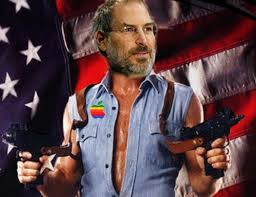


<p>now, we’ll explore the application of 1D convolution in stock price prediction, with a special focus on predicting Apple stock prices. We'll demonstrate how this technique can help uncover patterns and trends in historical stock data to make informed predictions.</p>

<p><em>Friendly advice: Never invest your money in Apple stocks. They might just spend your investment on creating fancy trash products like MacBooks !</em></p>


</div>


### **About the `yfinance` Library**

The `yfinance` library is a popular Python package used for accessing and downloading historical market data from Yahoo Finance.

### **Columns in the Downloaded Stock Data**

When you download stock data using `yfinance`, the resulting DataFrame typically includes the following columns:

- **Open**: The price at which the stock first traded upon the opening of the market on that particular day.
- **High**: The highest price at which the stock traded during the trading session of that day.
- **Low**: The lowest price at which the stock traded during the trading session of that day.
- **Close**: The price at which the stock last traded upon the closing of the market on that particular day.
- **Adj Close**: The adjusted closing price that accounts for corporate actions like stock splits and dividends.
- **Volume**: The total number of shares traded on that particular day.

For prediction purposes, we focus only on the `Close` price because it represents the final price of the stock for the trading day, incorporating all market information and reactions throughout the session. This price is generally considered the most accurate reflection of a stock's value and is often used in financial models to forecast future prices.

Through this part of the assignment, we will also use `Pandas` for data manipulation and preparation. `Pandas` is a powerful library that will help you handle and process the stock data efficiently, allowing you to prepare it for further analysis and model building.


In [11]:
# Function to download stock data
def download_stock_data(stock_symbol, start_date, end_date):
    """
    Downloads historical stock data from Yahoo Finance.

    Parameters:
    - stock_symbol (str): The symbol of the stock to download.
    - start_date (str): The start date for the data in 'YYYY-MM-DD' format.
    - end_date (str): The end date for the data in 'YYYY-MM-DD' format.

    Returns:
    - DataFrame: Historical stock data for the specified date range.
    """
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Parameters for downloading stock data you can change the date
stock_symbol = 'AAPL'
train_start_date = '2012-01-01'
train_end_date = '2020-01-01'

# Download training data for the specified stock
train_data = download_stock_data(stock_symbol, train_start_date, train_end_date)


[*********************100%***********************]  1 of 1 completed


In [12]:
#Display the first few rows of the DataFrame.
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607716,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400


In [13]:
# Describe the dataset to understand its structure and columns.
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03
mean,31.697148,31.977506,31.415435,31.706048,29.217445,2.379185e+08
std,12.650552,12.761931,12.561395,12.675630,12.842384,1.873327e+08
min,13.856071,14.271429,13.753571,13.947500,11.952173,4.544800e+07
25%,21.481785,21.681697,21.266518,21.557946,18.340344,1.102326e+08
50%,28.263750,28.550000,27.980000,28.262501,25.708290,1.737290e+08
75%,41.349376,41.867499,40.879375,41.313125,39.133538,2.988384e+08
max,72.779999,73.492500,72.379997,73.412498,71.250443,1.506120e+09


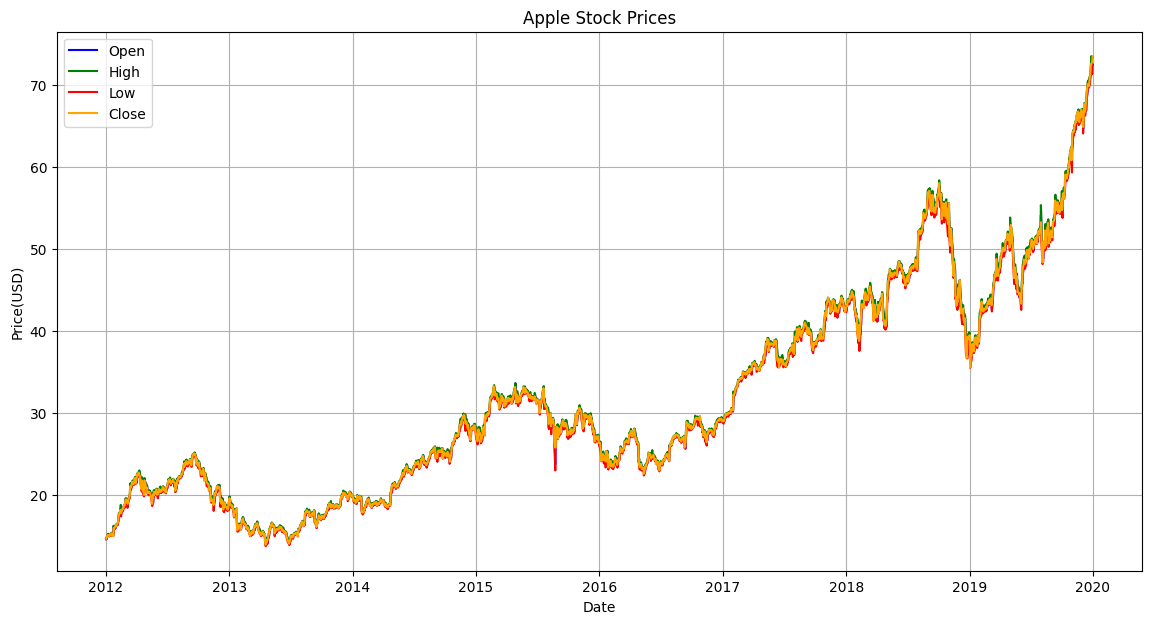

In [14]:
# Plot all the stock prices in a single figure
def plot_all_columns(df):
    plt.figure(figsize=(14, 7))
    columns = ['Open', 'High', 'Low', 'Close']
    colors = ['blue', 'green', 'red', 'orange']
    for col, color in zip(columns, colors):
        plt.plot(train_data.index, train_data[col], label=col, color=color)
    plt.title('Apple Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price(USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_all_columns(train_data)

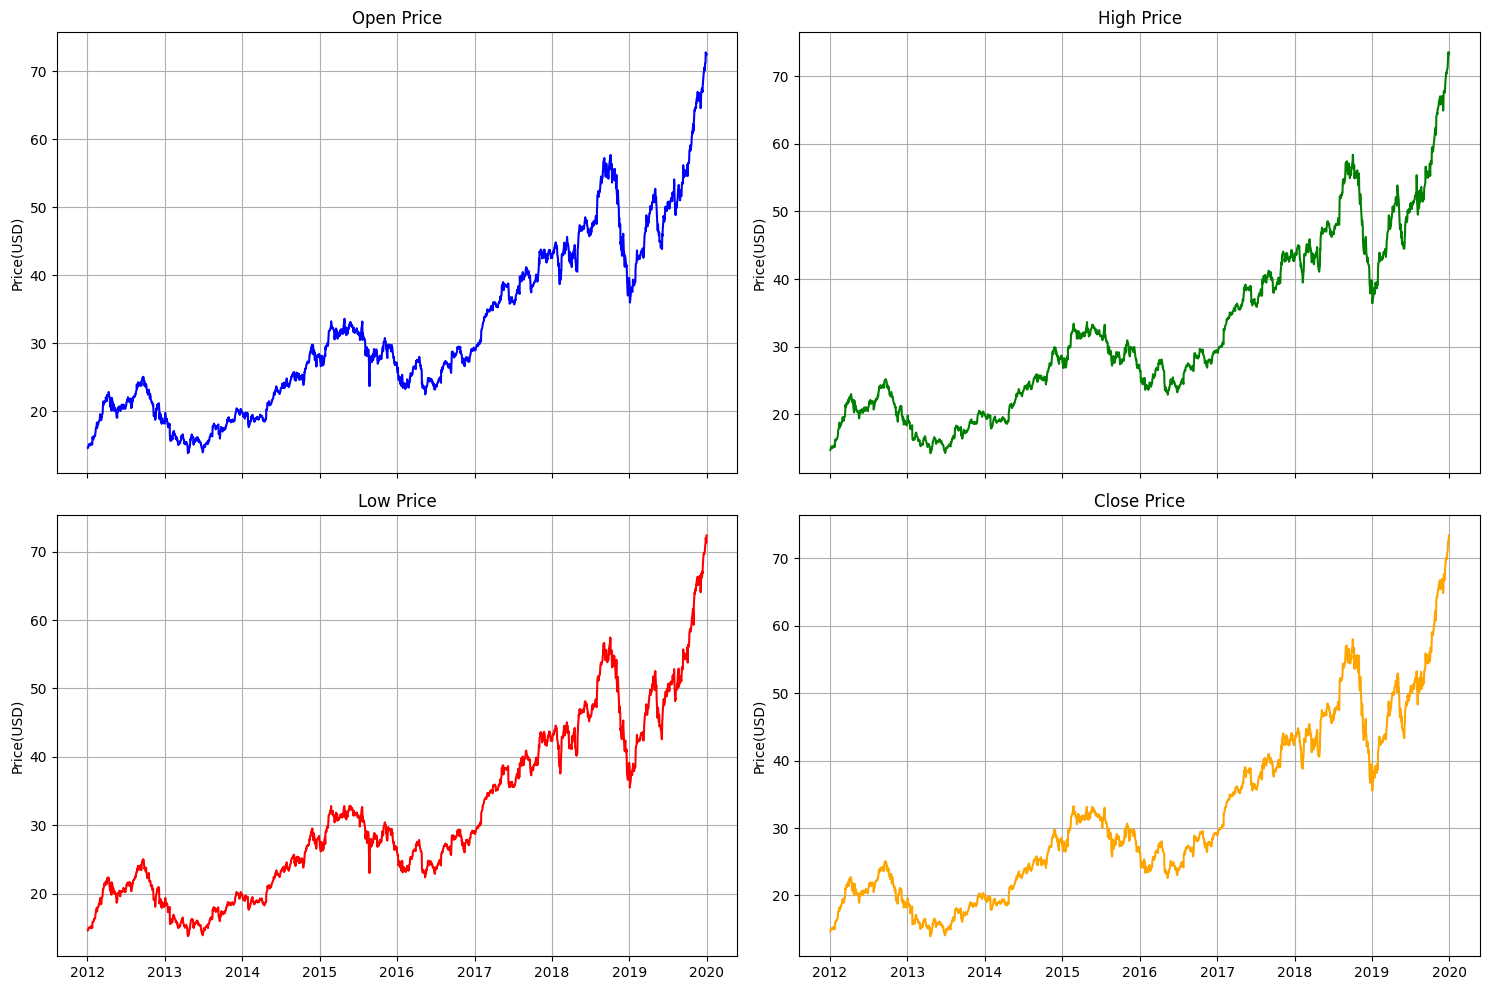

In [15]:
# Plot stock prices in separate subplots
def plot_columns_separately(df):
    fig, axs = plt.subplots(2,2,figsize=(15, 10))
    columns = ['Open', 'High', 'Low', 'Close']
    colors = ['blue', 'green', 'red', 'orange']
    axs = axs.flatten()

    for i, (col, color) in enumerate(zip(columns, colors)):
        axs[i].plot(train_data.index, train_data[col], color=color)
        axs[i].set_title(col+' Price')
        if i < 2:
            axs[i].set_xticklabels([])
        axs[i].set_ylabel('Price(USD)')
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()

plot_columns_separately(train_data)


In [16]:
# create new columns with value (Open - Close)
train_data['Difference'] = train_data['Open']-train_data['Close']
train_data

,Open,High,Low,Close,Adj Close,Volume,Difference
Date,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800,-0.065356
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000,-0.122857
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607716,271269600,-0.110000
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800,-0.093928
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400,0.134644
...,...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974495,48478800,0.105003
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342987,93121200,-1.272499
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316292,146266000,0.330002


In [17]:
train_data.index = pd.to_datetime(train_data.index, format='%Y-%m-%d')

In [18]:
# Add a 'Year' and 'Month' 'Day' column
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Day'] = train_data.index.day

# Aggregate by Year and calculate average 'Close' price
yearly_data =  train_data.groupby('Year')['Close'].mean()
print("Yearly Average Close Prices:")
print(yearly_data)


# Aggregate by Month and calculate average 'Close' price
monthly_data =  train_data.groupby('Month')['Close'].mean()
print("\nMonthly Average Close Prices:")
print(monthly_data)


# Aggregate by Day and calculate average 'Close' price

daily_data =  train_data.groupby('Day')['Close'].mean()
print("\nDaily Average Close Prices:")
print(daily_data)

Yearly Average Close Prices:
Year
2012    20.573204
2013    16.879817
2014    23.066164
2015    30.010000
2016    26.151002
2017    37.637769
2018    47.263357
2019    52.063988
Name: Close, dtype: float64

Monthly Average Close Prices:
Month
1     27.141553
2     28.210243
3     29.782137
4     30.242126
5     30.808069
6     30.886486
7     31.561109
8     33.193525
9     33.791409
10    34.815267
11    35.134573
12    34.483660
Name: Close, dtype: float64

Daily Average Close Prices:
Day
1     31.847006
2     31.589503
3     30.912411
4     31.506238
5     31.773204
6     31.700404
7     31.123717
8     31.515427
9     31.536355
10    31.362742
11    31.724857
12    32.018832
13    31.681934
14    31.172008
15    31.587423
16    31.968489
17    31.680624
18    32.369675
19    31.855053
20    32.111781
21    31.408368
22    31.833423
23    31.637937
24    31.563012
25    31.572728
26    32.441919
27    31.925640
28    31.016791
29    32.021387
30    32.174161
31    32.558615
Name: Cl

In [19]:
train_data

,Open,High,Low,Close,Adj Close,Volume,Difference,Year,Month,Day
Date,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800,-0.065356,2012,1,3
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000,-0.122857,2012,1,4
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607716,271269600,-0.110000,2012,1,5
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800,-0.093928,2012,1,6
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400,0.134644,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974495,48478800,0.105003,2019,12,24
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342987,93121200,-1.272499,2019,12,26
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316292,146266000,0.330002,2019,12,27


### **Assignment Questions**

**Based on results briefly explain why the average close price for January is lower and why it increases towards the end of the year.**

*The lower average close price in January is likely due to the "January Effect," where investors sell assets at year-end for tax purposes, leading to lower prices at the start of the year. Prices tend to rise towards the end of the year due to increased market activity, year-end rallies, and portfolio rebalancing by institutional investors.*

In [20]:
# Filter rows where 'Close' price is greater than a certain value

value = 50
high_close_prices = train_data[train_data['Close']> value]

print(f"Rows with Close Prices Greater Than {value}:")
high_close_prices.head()

Rows with Close Prices Greater Than 50:


,Open,High,Low,Close,Adj Close,Volume,Difference,Year,Month,Day
Date,,,,,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,47.832462,271742800,-0.592499,2018,8,1
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.230640,249616000,-1.702499,2018,8,2
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.373081,133789600,-0.240002,2018,8,3
2018-08-06,52.000000,52.312500,51.767502,52.267502,49.629440,101701600,-0.267502,2018,8,6
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.164173,102349600,0.552502,2018,8,7


In [21]:
# Filtering data where 'Close' price is greater than value1 and 'Volume' is less than value2
value1 = 30
value2 = 200000000

filtered_data = pd.merge(train_data[train_data['Close'] > value1],train_data[train_data['Close'] < value2])
print(f"Filtered Data (Close > {value1} and Volume < {value2}):")
filtered_data.head()

Filtered Data (Close > 30 and Volume < 200000000):


,Open,High,Low,Close,Adj Close,Volume,Difference,Year,Month,Day
0,30.042500,30.537500,30.040001,30.504999,27.310415,248034000,-0.462500,2015,2,10
1,30.692499,31.230000,30.625000,31.219999,27.950537,294247200,-0.527500,2015,2,11
2,31.514999,31.870001,31.392500,31.615000,28.304174,297898000,-0.100000,2015,2,12
3,31.820000,31.820000,31.412500,31.770000,28.442945,217088800,0.049999,2015,2,13
4,31.872499,32.220001,31.730000,31.957500,28.610809,252609600,-0.085001,2015,2,17


In [22]:
# Add a new column that indicates whether the closing price is greater than the opening price.
# assign the value "Yes" if the closing price is higher than the opening price, and "No" otherwise.

train_data['High_Close'] = np.where(train_data['Close']> train_data['Open'],'No','Yes')

# Represent rows where this column value is "Yes"
high_close_data = train_data.loc[train_data['High_Close']=='Yes']
print("Filtered Data with High Close Prices:")
high_close_data.head()

Filtered Data with High Close Prices:


,Open,High,Low,Close,Adj Close,Volume,Difference,Year,Month,Day,High_Close
Date,,,,,,,,,,,
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400,0.134644,2012,1,9,Yes
2012-01-10,15.211071,15.214286,15.053571,15.115714,12.764848,258196400,0.095357,2012,1,10,Yes
2012-01-11,15.095714,15.101786,14.975357,15.091071,12.744036,215084800,0.004642,2012,1,11,Yes
2012-01-12,15.081429,15.103571,14.955357,15.049643,12.709048,212587200,0.031786,2012,1,12,Yes
2012-01-19,15.362500,15.406071,15.232500,15.276786,12.900870,261738400,0.085714,2012,1,19,Yes


In [23]:
yearly_avg_close = train_data.groupby('Year')['Close'].mean()
total_mean = train_data['Close'].mean()
high_avg_years = yearly_avg_close[yearly_avg_close[:]>total_mean]

In [24]:
# Calculate average 'Close' price by year
yearly_avg_close = train_data.groupby('Year')['Close'].mean()

# Calculate the overall mean of the 'Close' prices
total_mean = train_data['Close'].mean()

# Filter years where the average close price is greater than the overall mean
high_avg_years = yearly_avg_close[yearly_avg_close[:]>total_mean].index
# Filter yearly average close prices for the selected years
filtered_years_data = yearly_avg_close[yearly_avg_close[:]>total_mean]

print(f"Filtered Data for Years with Average Close > Mean = {total_mean}:")
filtered_years_data


Filtered Data for Years with Average Close > Mean = 31.706047823604486:


,Close
Year,
2017,37.637769
2018,47.263357
2019,52.063988


In [25]:
#delete rows contain missing value
train_data.dropna()

,Open,High,Low,Close,Adj Close,Volume,Difference,Year,Month,Day,High_Close
Date,,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800,-0.065356,2012,1,3,No
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000,-0.122857,2012,1,4,No
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607716,271269600,-0.110000,2012,1,5,No
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800,-0.093928,2012,1,6,No
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400,0.134644,2012,1,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974495,48478800,0.105003,2019,12,24,Yes
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342987,93121200,-1.272499,2019,12,26,No
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316292,146266000,0.330002,2019,12,27,Yes


In [26]:
# Remove all columns except 'Close'
train_data = train_data[['Close']]
train_data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2019-12-24,71.067497
2019-12-26,72.477501
2019-12-27,72.449997


In [27]:
# Function to scale 'Close' prices using MinMaxScaler
def scale_close_prices(close_prices):
    """
    Scales the 'Close' prices of stock data to a range between 0 and 1.

    Parameters:
    - close_prices (DataFrame): A DataFrame containing the 'Close' prices of the stock.

    Returns:
    - scaler (MinMaxScaler): The fitted MinMaxScaler object.
    - scaled_close_prices (ndarray): The scaled 'Close' prices as a flattened array.
    """
    scaler = MinMaxScaler()
    scaler.fit(close_prices)
    scaled_close_prices = scaler.transform(close_prices)
    scaled_close_prices = scaled_close_prices.flatten()

    return scaler, scaled_close_prices

close_price = train_data[['Close']]

# Calling the function to scale the 'Close' prices
scaler, scaled_close_prices = scale_close_prices(close_price)

# Printing scaled prices and their shape
print(scaled_close_prices)
print(scaled_close_prices.shape)

[0.01243228 0.01375958 0.01651631 ... 0.98381398 0.99104513 1.        ]
(2012,)


In [28]:
# Function to prepare data for training/testing
def prepare_data(data, lookback_period):
    """
    Prepares the data for training/testing by creating sequences of a given length (lookback_period)
    and corresponding labels.

    Parameters:
    - data (array-like): The input data to be prepared, typically a time series.
    - lookback_period (int): The number of previous time steps to use for predicting the next time step.

    Returns:
    - x_data (numpy.ndarray): An array of shape (number_of_samples, lookback_period, 1) containing the input sequences.
    - y_data (numpy.ndarray): An array of shape (number_of_samples,) containing the target values for each sequence.
    """
    x_data, y_data = [], []

    # Loop over the data to create sequences and their corresponding target values
    for day in range(lookback_period, len(data)):
        x_data.append(data[day-lookback_period:day])
        y_data.append(data[day])

    # Convert lists to numpy arrays
    x_data, y_data = np.array(x_data), np.array(y_data)

    # Reshape x_data to be 3-dimensional: (number_of_samples, lookback_period, 1)
    x_data = np.reshape(x_data,(x_data.shape[0],lookback_period,1))

    return x_data, y_data


lookback_period = 60
x_train, y_train = prepare_data(scaled_close_prices, lookback_period)

print(x_train.shape)
print(y_train.shape)


(1952, 60, 1)
(1952,)


In [29]:
def build_model():
    """
    Constructs and compiles a sequential model for predicting stock prices using Conv1D,
    LSTM, Dropout, and Dense layers.

    This model is designed to process sequential data (such as time-series stock prices)
    and capture patterns using convolutional and recurrent layers.

    - Conv1D: Applies 1D convolutional layers to extract features from the input sequences.
    - LSTM: A type of Recurrent Neural Network (RNN) layer that captures long-term dependencies in sequences.
    - Dropout: A regularization technique to prevent overfitting by randomly setting a fraction of input units to zero during training.
    - Dense: Fully connected layer to produce the final output.

    Returns:
    - model (keras.models.Sequential): The compiled Keras model ready for training and evaluation.
    """
    model = Sequential()  # Initialize a sequential model

    # The input shape is defined by the training data dimensions (number of time steps, number of features)
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))

    # LSTM layers are used to capture dependencies in sequential data, and Bidirectional means it processes the data in both forward and backward directions
    model.add(LSTM(50, return_sequences=False))

    # Dropout helps to prevent overfitting by randomly setting 30% of the input units to zero during training
    model.add(Dropout(0.3))

    # This layer produces the final prediction value (e.g., stock price)
    model.add(Dense(1))

    # Compile the model with the Adam optimizer and mean squared error loss function
    # Adam is an optimization algorithm, and mean squared error is a common loss function for regression tasks
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


# Compile the model
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,779 (65.54 KB)

 Trainable params: 16,779 (65.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0313
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012


In [31]:
import yfinance as yf
import datetime as dt

# Function to download stock test data
def download_test_data(stock_symbol, train_end_date):
    """
    Downloads the test data for a stock using yfinance.

    Parameters:
    - stock_symbol (str): The stock ticker symbol (e.g., 'AAPL').
    - train_end_date (str): The end date of the training data in 'YYYY-MM-DD' format.

    Returns:
    - test_data (DataFrame): The downloaded test data for the specified stock.
    """
    test_start = train_end_date  # Start date for test data is the end date of training data
    test_end = dt.datetime.now().strftime('%Y-%m-%d')  # End date is today's date

    # Download the test data
    test_data = yf.download(stock_symbol, start=test_start, end=test_end)

    return test_data

# Example usage
test_data = download_test_data(stock_symbol, train_end_date)
test_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565216,132079200
...,...,...,...,...,...,...
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100
2024-10-15,233.610001,237.490005,232.369995,233.850006,233.850006,64751400
2024-10-16,231.600006,232.119995,229.839996,231.779999,231.779999,34082200


In [32]:
# Get the most recent row of the test data
yesterday_df = test_data.tail(1)

# Extract and format the close price
close_price = yesterday_df['Close'].iloc[0]
date = yesterday_df.index[0]

print(f"Date: {date.strftime('%Y-%m-%d')}")
print(f"Yesterday's Close Price: ${close_price:.2f}")

Date: 2024-10-18
Yesterday's Close Price: $235.00


In [33]:
# Function to prepare model inputs
def prepare_model_inputs(train_data, test_data, scaler, lookback_period):
    # Combine train and test data into a single series, preserving the order
    # only CLose prices and axis = 0
    total_data = pd.concat([train_data,test_data['Close']], axis=0)
    print(total_data)
    model_inputs = total_data[len(total_data) - len(test_data) - lookback_period:].values
    model_inputs = model_inputs.reshape(-1, 1)
    scaler.fit(train_data.values)
    model_inputs = scaler.transform(model_inputs)

    # Prepare test data
    x_test, _ = prepare_data(model_inputs, lookback_period)
    model_inputs = model_inputs[lookback_period:]

    return model_inputs, x_test


model_inputs, x_test = prepare_model_inputs(train_data, test_data, scaler, lookback_period)


print()
print(model_inputs.shape)
print(x_test.shape)


                 Close
Date                  
2012-01-03   14.686786
2012-01-04   14.765714
2012-01-05   14.929643
2012-01-06   15.085714
2012-01-09   15.061786
...                ...
2024-10-14  231.300003
2024-10-15  233.850006
2024-10-16  231.779999
2024-10-17  232.149994
2024-10-18  235.000000

[3220 rows x 1 columns]

(1208, 1)
(1208, 60, 1)


In [34]:
# Make predictions
print(x_test.shape)
predicted_stock_prices = model.predict(x_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
print(predicted_stock_prices.shape)

(1208, 60, 1)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
(1208, 1)


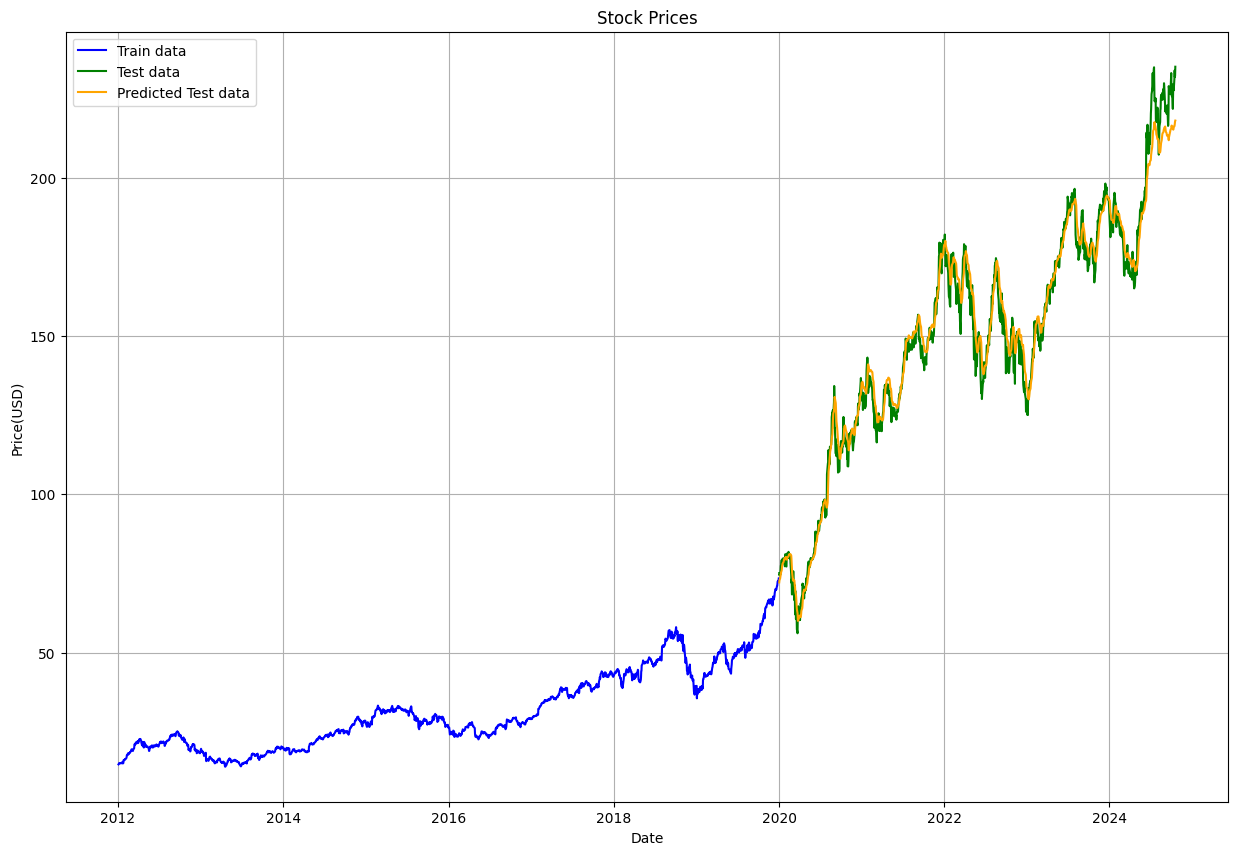

In [35]:
# Plot the results
def plot_predictions(train_data, test_data, predicted_test_prices, stock_symbol):
    """
    Plots the actual and predicted stock prices to visualize the model's performance.

    Args:
    - train_data (pd.DataFrame): DataFrame containing the training data with 'Close' prices and date index.
    - test_data (pd.DataFrame): DataFrame containing the test data with 'Close' prices and date index.
    - predicted_test_prices (numpy.ndarray): Array of predicted stock prices for the test data.
    - stock_symbol (str): The symbol of the stock being analyzed (e.g., 'AAPL' for Apple).

    Returns:
    - None: This function generates a plot of the stock prices.
    """
    # Create a new figure with a specified size
    fig1, axs1 = plt.subplots(figsize=(15,10))

    # Plot training data
    # using index of your train data as x and close prices as y
    # Training data is plotted in blue to show the historical stock prices used to train the model
    plt.plot(train_data.index, train_data['Close'], label='Train data',color='blue')

    # Plot actual test data
    # Actual test data is plotted in green to show the true stock prices for the test period
    plt.plot(test_data.index, test_data['Close'], label='Test data',color='green')

    # Plot predicted test data
    # dates of predicted test data is same as test data
    # Predicted test data is plotted in orange to compare the model's predictions with the actual prices
    plt.plot(test_data.index, predicted_stock_prices,label='Predicted Test data', color='orange')

    # Title of the plot, including the stock symbol
    # Label for the x-axis
    # Label for the y-axis
    # Show legend to identify different data series
    # Add grid lines to the plot for better readability
    plt.title('Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price(USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.show()


plot_predictions(train_data, test_data, predicted_stock_prices, stock_symbol)


In [36]:
# Predict today's and tomorrow's stock price
def predict_future_price(model, last_data, lookback_period, scaler, days_to_predict=2):
    future_predictions = []
    current_input = last_data[-lookback_period:].reshape(1, lookback_period, 1)

    for _ in range(days_to_predict):
        future_price = model.predict(current_input)
        future_predictions.append(future_price[0, 0])

        future_price_reshaped = future_price.reshape(1, 1, 1)
        current_input = np.append(current_input[:, 1:, :], future_price_reshaped, axis=1)

    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

future_predictions = predict_future_price(model, model_inputs, lookback_period, scaler,5)

print(f"Predicted price for today: {future_predictions[0][0]:.2f} USD")
print(f"Predicted price for tomorrow: {future_predictions[1][0]:.2f} USD")



# Predict prices of future

# Get today's date
cur_date = dt.datetime.now()

# Create a list of dates and predictions
dates = [cur_date + dt.timedelta(days=i) for i in range(len(future_predictions))]
predictions = future_predictions.flatten()  # Flatten the array to simplify iteration

# Print predictions with dates
for date, prediction in zip(dates, predictions):
    print(f"Predicted price for {date.strftime('%Y-%m-%d')}: {prediction:.2f} USD")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted price for today: 218.51 USD
Predicted price for tomorrow: 217.61 USD
Predicted price for 2024-10-21: 218.51 USD
Predicted price for 2024-10-22: 217.61 USD
Predicted price for 2024-10-23: 215.48 USD
Predicted price for 2024-10-24: 214.28 USD
Predicted price for 2024-10-25: 212.99 USD


In [37]:
# Simulate investment strategy with logging
def simulate_investment_strategy_with_logging(actual_prices, predicted_prices, test_dates, initial_investment):
    # investment variables
    investment_amount = initial_investment
    stocks_held = 0
    cash = investment_amount
    total_value = investment_amount
    logs = []  # a list to log each step of the simulation

    # Iterating through the predicted prices
    for i in range(len(predicted_prices) - 1):
        action = ''  # Variable to record the action taken (buy/sell)

        # Determine whether to buy or sell based on predicted vs. actual prices
        if actual_prices[i] < predicted_prices[i + 1]:
            # Buy signal: If actual price is less than predicted price, buy shares with all the money you have
            if cash > 0:  # Ensure there is cash available
                stocks_held = cash / actual_prices.iloc[i]  # Calculate how many shares can be bought
                cash = 0  # Use up all available cash
                action = f'Bought {stocks_held:.4f} shares at {actual_prices.iloc[i]:.2f} USD'  # Record the buy action
        elif actual_prices[i] > predicted_prices[i + 1]:
            # Sell signal: If actual price is greater than predicted price, sell shares
            if stocks_held > 0:  # Ensure there are shares to sell
                cash = stocks_held * actual_prices.iloc[i]  # Calculate the cash value from selling the shares
                action = f'Sold {stocks_held:.4f} shares at {actual_prices.iloc[i]:.2f} USD'  # Record the sell action
                stocks_held = 0  # Reset stocks held to 0 after selling

        # Calculate the total value of the investment
        total_value = cash + stocks_held * actual_prices.iloc[i]
        # Log the investment status for the current date
        logs.append({
            'Date': test_dates[i].strftime('%Y-%m-%d'),
            'Cash': cash,
            'Stocks Held': stocks_held,
            'Total Value': total_value,
            'stock price': actual_prices[i],
            'tomorrow predicted price': predicted_prices[i + 1, 0],
            'Action': action
        })

    # Log the final status at the end of the test period
    final_value = total_value
    profit_or_loss = final_value - initial_investment
    logs.append({
        'Date': test_dates[-1].strftime('%Y-%m-%d'),
        'Cash': cash,
        'Stocks Held': stocks_held,
        'Total Value': final_value,
        'stock price': actual_prices[-1],
        'tomorrow predicted price': predicted_prices[-2, 0],
        'Action': 'End of Test Period'
    })

    return final_value, profit_or_loss, logs

In [38]:
# Initial investment amount you can change this value
initial_investment = 100000


test_dates = test_data.index.values
test_dates = pd.to_datetime(test_dates)

# Perform the investment simulation with logging
final_value, apple_profit_or_loss, logs = simulate_investment_strategy_with_logging(
    test_data["Close"], predicted_stock_prices, test_dates, initial_investment)

print(f"\nWith an initial investment of {initial_investment:.2f} USD using the model's predictions:")
print(f"- Your investment would be worth {final_value:.2f} USD.")
print(f"- Your profit/loss would be {apple_profit_or_loss:.2f} USD.\n")



<ipython-input-37-23cc05c66e3f>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if actual_prices[i] < predicted_prices[i + 1]:
<ipython-input-37-23cc05c66e3f>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif actual_prices[i] > predicted_prices[i + 1]:
<ipython-input-37-23cc05c66e3f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'stock price': actual_prices[i],



With an initial investment of 100000.00 USD using the model's predictions:
- Your investment would be worth 228077.08 USD.
- Your profit/loss would be 128077.08 USD.



<ipython-input-37-23cc05c66e3f>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'stock price': actual_prices[-1],


In [39]:
# Print logs
print("Investment Logs:")
for log in logs:
  if log['Action']:
    print(log)


Investment Logs:
{'Date': '2020-01-24', 'Cash': 0, 'Stocks Held': 1256.6366217459724, 'Total Value': 100000.0, 'stock price': 79.57749938964844, 'tomorrow predicted price': 79.77086, 'Action': 'Bought 1256.6366 shares at 79.58 USD'}
{'Date': '2020-01-29', 'Cash': 101894.37932378698, 'Stocks Held': 0, 'Total Value': 101894.37932378698, 'stock price': 81.08499908447266, 'tomorrow predicted price': 79.76288, 'Action': 'Sold 1256.6366 shares at 81.08 USD'}
{'Date': '2020-01-31', 'Cash': 0, 'Stocks Held': 1316.8476121459985, 'Total Value': 101894.37932378698, 'stock price': 77.37750244140625, 'tomorrow predicted price': 80.03631, 'Action': 'Bought 1316.8476 shares at 77.38 USD'}
{'Date': '2020-02-04', 'Cash': 104969.2172925379, 'Stocks Held': 0, 'Total Value': 104969.2172925379, 'stock price': 79.7125015258789, 'tomorrow predicted price': 79.32399, 'Action': 'Sold 1316.8476 shares at 79.71 USD'}
{'Date': '2020-02-07', 'Cash': 0, 'Stocks Held': 1311.9922218907745, 'Total Value': 104969.21729

In [40]:
# Convert logs to a DataFrame,

df_logs = pd.DataFrame(logs)

# set the Date column as the index,
df_logs.index=df_logs['Date']

# display the data.
df_logs

,Date,Cash,Stocks Held,Total Value,stock price,tomorrow predicted price,Action
Date,,,,,,,
2020-01-02,2020-01-02,100000.000000,0.0,100000.000000,75.087502,72.805817,
2020-01-03,2020-01-03,100000.000000,0.0,100000.000000,74.357498,73.417625,
2020-01-06,2020-01-06,100000.000000,0.0,100000.000000,74.949997,73.852036,
2020-01-07,2020-01-07,100000.000000,0.0,100000.000000,74.597504,74.240219,
2020-01-08,2020-01-08,100000.000000,0.0,100000.000000,75.797501,74.631836,
...,...,...,...,...,...,...,...
2024-10-14,2024-10-14,228077.076951,0.0,228077.076951,231.300003,216.528397,
2024-10-15,2024-10-15,228077.076951,0.0,228077.076951,233.850006,217.316025,
2024-10-16,2024-10-16,228077.076951,0.0,228077.076951,231.779999,217.790649,


In [41]:
# Print final log information
last_log = logs[-1]
last_log_date = pd.to_datetime(last_log['Date']).strftime('%Y-%m-%d')
print("\nFinal Investment Status:")
print(f"Date: {last_log_date}")
print(f"Current Cash: {last_log['Cash']:.2f} USD")
print(f"Stocks Held: {last_log['Stocks Held']:.4f}")
print(f"Total Value: {last_log['Total Value']:.2f} USD")
print(f"Action: {last_log['Action']}\n")


Final Investment Status:
Date: 2024-10-18
Current Cash: 228077.08 USD
Stocks Held: 0.0000
Total Value: 228077.08 USD
Action: End of Test Period



*Let’s swap out Apple for Microsoft this time and see if we can make our money work harder than Steve Jobs ever did!*



<img src="https://m.media-amazon.com/images/M/MV5BYjRjMjljN2QtNDA3Mi00ZjEwLTlhMjAtMTA3N2VmN2IwY2QzXkEyXkFqcGc@._V1_.jpg" alt="Steve Jobs" style="width: 600px; height: auto;">

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0604
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015


[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2012-01-03   26.770000
2012-01-04   27.400000
2012-01-05   27.680000
2012-01-06   28.110001
2012-01-09   27.740000
...                ...
2024-10-14  419.140015
2024-10-15  418.739990
2024-10-16  416.119995
2024-10-17  416.720001
2024-10-18  418.160004

[3220 rows x 1 columns]
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


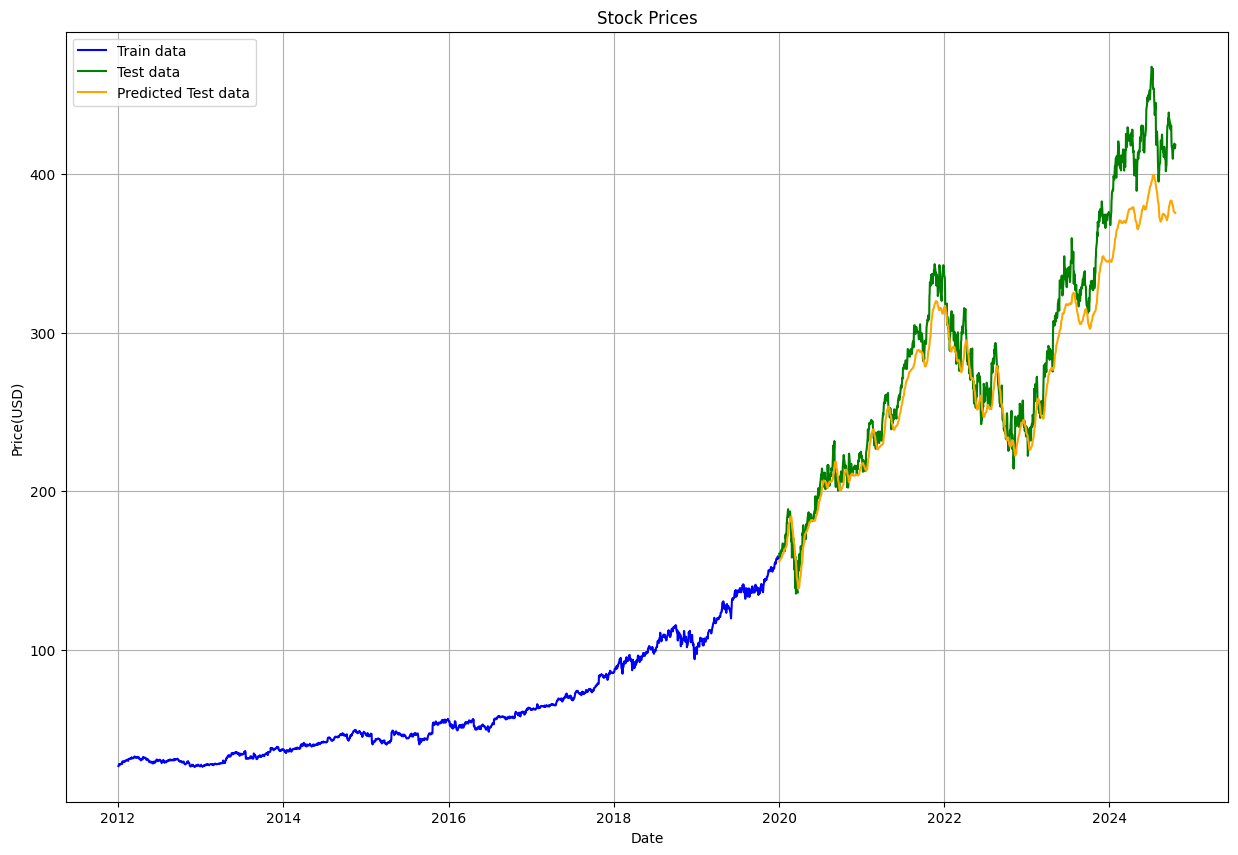


With an initial investment of 100000.00 USD using the model's predictions:
- Your investment would be worth 224482.95 USD.
- Your profit/loss would be 124482.95 USD.



<ipython-input-37-23cc05c66e3f>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if actual_prices[i] < predicted_prices[i + 1]:
<ipython-input-37-23cc05c66e3f>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif actual_prices[i] > predicted_prices[i + 1]:
<ipython-input-37-23cc05c66e3f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'stock price': actual_prices[i],
<ipython-input-37-23cc05c66e3f>:49: FutureWarning: Series.__g

In [42]:
stock_symbol = 'MSFT'

train_data = download_stock_data(stock_symbol, train_start_date, train_end_date)

train_data = train_data.drop(columns=[col for col in train_data.columns if col != 'Close'])

close_price = train_data[['Close']]

# Call the function to scale the 'Close' prices
scaler, scaled_close_prices = scale_close_prices(close_price)

lookback_period = 60
x_train, y_train = prepare_data(scaled_close_prices, lookback_period)


model = build_model()

model.fit(x_train, y_train, epochs=10, batch_size=32)
test_data = download_test_data(stock_symbol, train_end_date)
model_inputs, x_test = prepare_model_inputs(train_data, test_data, scaler, lookback_period)
predicted_stock_prices = model.predict(x_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)


plot_predictions(train_data, test_data, predicted_stock_prices, stock_symbol)



# Initial investment amount you can change this value
initial_investment = 100000


test_dates = test_data.index.values
test_dates = pd.to_datetime(test_dates)

# Perform the investment simulation with logging
final_value, microsoft_profit_or_loss, logs = simulate_investment_strategy_with_logging(
    test_data["Close"], predicted_stock_prices, test_dates, initial_investment)

print(f"\nWith an initial investment of {initial_investment:.2f} USD using the model's predictions:")
print(f"- Your investment would be worth {final_value:.2f} USD.")
print(f"- Your profit/loss would be {microsoft_profit_or_loss:.2f} USD.\n")




In [43]:
if microsoft_profit_or_loss > apple_profit_or_loss:
    print("Looks like Microsoft outperformed Apple!")
else:
    print("Even if Apple did better, it doesn't matter. Steve Jobs may have been a genius, but that doesn’t change the fact that Apple is still a bit overrated!")


Even if Apple did better, it doesn't matter. Steve Jobs may have been a genius, but that doesn’t change the fact that Apple is still a bit overrated!


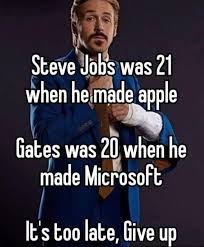


### 2D Convolution

2D convolution is a critical technique in image processing and other tasks where data is represented in two dimensions, such as images. In 2D convolution, a kernel (or filter) slides over a 2D input matrix to produce a feature map. This technique is used for tasks like edge detection, blurring, and pattern recognition in images.

#### How 2D Convolution Works
The process of 2D convolution involves applying a kernel to an input matrix by sliding the kernel over the matrix and performing element-wise multiplication followed by a sum. This operation results in a new matrix that highlights features based on the kernel used.

#### Applications of 2D Convolution
- **Image Processing**: 2D convolution is fundamental for operations like edge detection, sharpening, and smoothing in image processing. By applying different kernels, various features in the image can be emphasized or suppressed.
- **Feature Extraction in CNNs**: In Convolutional Neural Networks (CNNs), 2D convolution layers are used to extract features from images, which are then used for tasks like image classification, object detection, and segmentation.
- **Medical Imaging**: 2D convolution is used in medical imaging to enhance features or detect abnormalities in images such as MRI scans and X-rays.


For understanding the mathematics behind 2D convolution, I recommend watching
- [YouTube video](https://www.youtube.com/shorts/D746UYYpTK4).
- [YouTube video](https://www.youtube.com/watch?v=O2CBKXr_Tuc).



In [44]:
def convolve_2d_four_loops(image, kernel, stride=1, pad=0):
    """
    Perform 2D convolution using four nested loops.

    Args:
        image (numpy.ndarray): 2D array representing the input image.
        kernel (numpy.ndarray): 2D array representing the filter to apply to the image.
        stride (int): The stride of the convolution.
        pad (int): The amount of zero-padding added to the image.

    Returns:
        numpy.ndarray: 2D array representing the convolution result.
    """
    image_height, image_width = image.shape[0],image.shape[1]
    kernel_height, kernel_width = kernel.shape[0],kernel.shape[1]

    # Calculate the dimensions of the output feature map
    output_height = (image_height + 2*pad - kernel_height) // stride + 1
    output_width = (image_width + 2*pad - kernel_width) // stride + 1


    # Apply padding to the image usign np.pad or np.zeros
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')

    # Initialize the output feature map
    output = np.zeros((output_height, output_width))

    # Perform convolution using four loops
    for ih in range(output_height):
      for iw in range(output_width):
        for kh in range(kernel_height):
          for kw in range(kernel_width):
            output[ih][iw]+=kernel[kh, kw] * padded_image[ih * stride + kh, iw * stride + kw]
    return output


In [45]:
# Function to perform 2D convolution using two loops with vectorized operations
def convolve_2d_two_loops(image, kernel,stride = 1 , pad = 0):
    """
    Convolve a 2D image with a kernel using two loops.

    Args:
        image: 2D array representing the input image.
        kernel: 2D array representing the filter to apply to the image.

    Returns:
        output: 2D array representing the convolution result.
    """
    image_height, image_width = image.shape[0],image.shape[1]
    kernel_height, kernel_width = kernel.shape[0],kernel.shape[1]

    # Calculate the dimensions of the output feature map
    output_height = (image_height + 2*pad - kernel_height) // stride + 1
    output_width = (image_width + 2*pad - kernel_width) // stride + 1


    # Apply padding to the image usign np.pad or np.zeros
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')

    # Initialize the output feature map
    output = np.zeros((output_height, output_width))

    # Perform convolution by sliding the kernel across the padded image using two loops and vector operations
    for ih in range(output_height):
      for iw in range(output_width):
        output[ih][iw] = np.sum(padded_image[ih:ih+kernel_height, iw:iw+kernel_width]*kernel)

    return output

### Convolution Using im2col

The `im2col` method is a powerful technique used to convert convolution operations into matrix multiplications. This technique simplifies and speeds up convolution computations, which are fundamental in many image processing and deep learning tasks.

#### im2col Transformation:
The `im2col` technique involves extracting overlapping patches from the padded image, each corresponding to a position of the kernel. These patches are then flattened into column vectors.

### Multiplication
Once the image patches are transformed into the im2col matrix, convolution can be performed using matrix multiplication. Flatten the kernel matrix into a vector `k_vec`. The convolution result can then be obtained by multiplying the im2col matrix by `k_vec`.

<img src="https://www.researchgate.net/publication/364684841/figure/fig7/AS:11431281091934216@1666661734455/An-example-of-the-Im2col-convolution-optimization-algorithm-In-terms-of-FPGA-based.png" alt="Steve Jobs" style="width: 750px; height: auto;">


For an image matrix of size `H x W` and a kernel of size `kH x kW` with stride `S`, we can ask:

- **Question 1:**
  What will be the number of columns in the output matrix from the im2col transformation?

  **Answer:**

  *The number of columns in the output matrix (from im2col) corresponds to the total number of positions the kernel can take. This can be calculated as the number of sliding windows that fit horizontally and vertically in the image. These are calculated using the following formulas:* \\

  *Output Height = ⌊(H - kH) / S⌋ + 1* \\
  *Output Width = ⌊(W - kW) / S⌋ + 1* \\
  *Number of Columns = Output Height × Output Width* \\
  
- **Question 2:**
What will be the number of rows in the im2col matrix?

  **Answer:**

  *Number of Rows = kH × kW*



In [46]:
# implement convolution using im2col transformation
def im2col(image, kernel_height, kernel_width, stride=1, pad=0):
    image_height, image_width = image.shape[0],image.shape[1]

    # Pad the image
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')

    # Calculate the dimensions of the output matrix
    out_height = (image_height-kernel_height + 2*pad) //stride + 1
    out_width = (image_width-kernel_width + 2*pad) //stride + 1

    # Create the im2col matrix
    col_index = 0
    cols = np.zeros((kernel_height * kernel_width, out_height * out_width))
    for h in range(out_height):
      for w in range(out_width):
        cols[:, col_index] = padded_image[h*stride:h*stride+kernel_height, w*stride:w*stride+kernel_width].flatten()
        col_index += 1

    return cols, out_height, out_width

def convolve_2d_im2col(image, kernel, stride=1, pad=0):
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

    image_cols, out_height, out_width = im2col(image, kernel_height, kernel_width, stride, pad)

    # Flatten the kernel
    kernel_flat = kernel.flatten()

    # Perform the convolution using matrix multiplication
    output_flat = np.dot(kernel_flat,image_cols)

    # Reshape the output to the correct dimensions
    output = output_flat.reshape(out_height, out_width)

    return output



In [47]:
# Define a small image and kernel for testing
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0],
    [0, -1]
])

# Hyperparameters for convolution
stride = 1
pad = 1



# Sanity check
print("Sanity Check: Comparing Results for 2D Convolution")

# Perform convolution using four loops
result_four_loops = convolve_2d_four_loops(image, kernel, stride=stride, pad=pad)
print("Four loops:\n", result_four_loops)

# Perform convolution using two loops and vectorized operations
result_two_loops = convolve_2d_two_loops(image, kernel, stride=stride, pad=pad)
print("Two loops:\n", result_two_loops)

# Perform convolution using im2col transformation
result_im2col = convolve_2d_im2col(image, kernel, stride=stride, pad=pad)
print("im2col method:\n", result_im2col)




# Compare the results
if (np.allclose(result_four_loops, result_two_loops) and
    np.allclose(result_two_loops, result_im2col)):
    print("Sanity Check Passed: All methods produce similar results.")
else:
    print("Sanity Check Failed: The methods produce different results.")


Sanity Check: Comparing Results for 2D Convolution
Four loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Two loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
im2col method:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Sanity Check Passed: All methods produce similar results.


In [48]:
# Function to measure average time for a number of iterations
def benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width,stride , pad ,iterations):
    np.random.seed(42)
    random_image = np.random.rand(image_height,image_width)
    random_kernel = np.random.rand(kernel_height,kernel_width)

    # Measure the execution time for each method
    time_four_loops = timeit.timeit(lambda: convolve_2d_four_loops(random_image, random_kernel), number=iterations)
    time_two_loops = timeit.timeit(lambda: convolve_2d_two_loops(random_image, random_kernel), number=iterations)
    time_im2col = timeit.timeit(lambda: convolve_2d_im2col(random_image, random_kernel), number=iterations)

    return (time_four_loops, time_two_loops, time_im2col)

# Input the number of iterations
num_iterations = 100

# Run benchmark and print results
image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 5
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width,stride , pad ,num_iterations)

print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")



Average times over 100 iterations (in seconds):
Four loops: 3.861754321999996
Two loops: 1.2850733639999987
im2col: 0.7069068739999977


### **Assignment Questions for 2D Convolution**

#### **1. Performance Comparison of 2D Convolution Methods**

After running the 2D convolution methods (four loops, two loops, and `im2col`), compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm and memory usage of each method.

**Answer:**

*The im2col method was the fastest, and the four-loop method was the slowest. The four-loop approach is slower due to iteration over both the image and kernel, while im2col leverages efficient matrix multiplication, significantly speeding up the process despite some overhead in the transformation step.*

---

#### **2. Effect of Stride and Padding on Performance**

Try changing the values of `stride` and `pad`. How do these changes affect the performance of the different convolution methods? Which method shows the most significant performance change with varying stride and padding?

**Answer:**

*The four-loop method shows the most significant performance change with varying padding and stride. Increasing padding has a more substantial effect on performance compared to adjusting the stride, as it directly increases the image size and the number of computations, leading to a noticeable slowdown, especially in the four-loop method. A larger stride reduces the number of kernel applications, speeding up the process, while a smaller stride increases computation time by introducing more overlapping kernel applications. The im2col method, on the other hand, is less affected by changes in stride and padding due to its efficient matrix multiplication.*

---

#### **3. Scaling with Image and Kernel Size**

Change the `image_height`, `image_width`, `kernel_height`, and `kernel_width` values (e.g., double both). How does the performance scale with the size of the image and kernel? Which method is most affected by these changes?

**Answer:**

*Doubling the image and kernel size impacts the four-loop method the most due to its direct iteration over all elements, causing a significant slowdown. The two-loop method is more efficient but still affected. The im2col method handles scaling best, because of optimized matrix multiplication.*

---

#### **4. When to Use `im2col` Method**

Based on your experiments, when would you prefer to use the `im2col` method over the other methods? Consider factors like image size, kernel size, stride, padding, and computational efficiency.

**Answer:**

*I would prefer to use the im2col method when dealing with larger images and kernels. It's particularly useful when the stride and padding are varied, as it's optimized for matrix operations, making it much faster than the loop-based methods. For smaller images or simple tasks, the other methods might be fine, but im2col is best for more complex, large-scale tasks.*

---

#### **5. Interpretation of Results for Small Image and Kernel Sizes**

For smaller image and kernel sizes, performance differences may be less noticeable. Can you explain why some methods, such as `im2col`, might not always be the best choice when working with small inputs?

**Answer:**

*For smaller image and kernel sizes, methods like im2col might not always be the best choice because the overhead of transforming the image into columns and performing matrix multiplication can outweigh the benefits.*

---


In [49]:
from skimage import io, color
from skimage.transform import resize

# Load and preprocess image
def load_and_preprocess_image(image_path, new_size=(256, 256)):
    image = io.imread(image_path)
    if len(image.shape) == 3:  # Check if the image is in color
        image = color.rgb2gray(image)
    image = resize(image, new_size, mode='reflect')
    return image

# Display images
def display_images(original, convolved_images, titles):
    num_convolutions = len(convolved_images)
    num_rows = (num_convolutions + 1) // 2  # Calculate number of rows needed for the grid
    fig_width = 12
    fig_height = 6 + 3 * num_rows  # Adjust height dynamically based on the number of rows

    fig, axes = plt.subplots(num_rows + 1, 2, figsize=(fig_width, fig_height))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Display original image
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')

    # Display convolved images
    for i, (img, title) in enumerate(zip(convolved_images, titles), start=1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')
        # Adding border to highlight the images
        axes[i].spines['top'].set_color('blue')
        axes[i].spines['top'].set_linewidth(2)
        axes[i].spines['right'].set_color('blue')
        axes[i].spines['right'].set_linewidth(2)
        axes[i].spines['bottom'].set_color('blue')
        axes[i].spines['bottom'].set_linewidth(2)
        axes[i].spines['left'].set_color('blue')
        axes[i].spines['left'].set_linewidth(2)

    # Hide any unused axes
    for ax in axes[len(convolved_images) + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



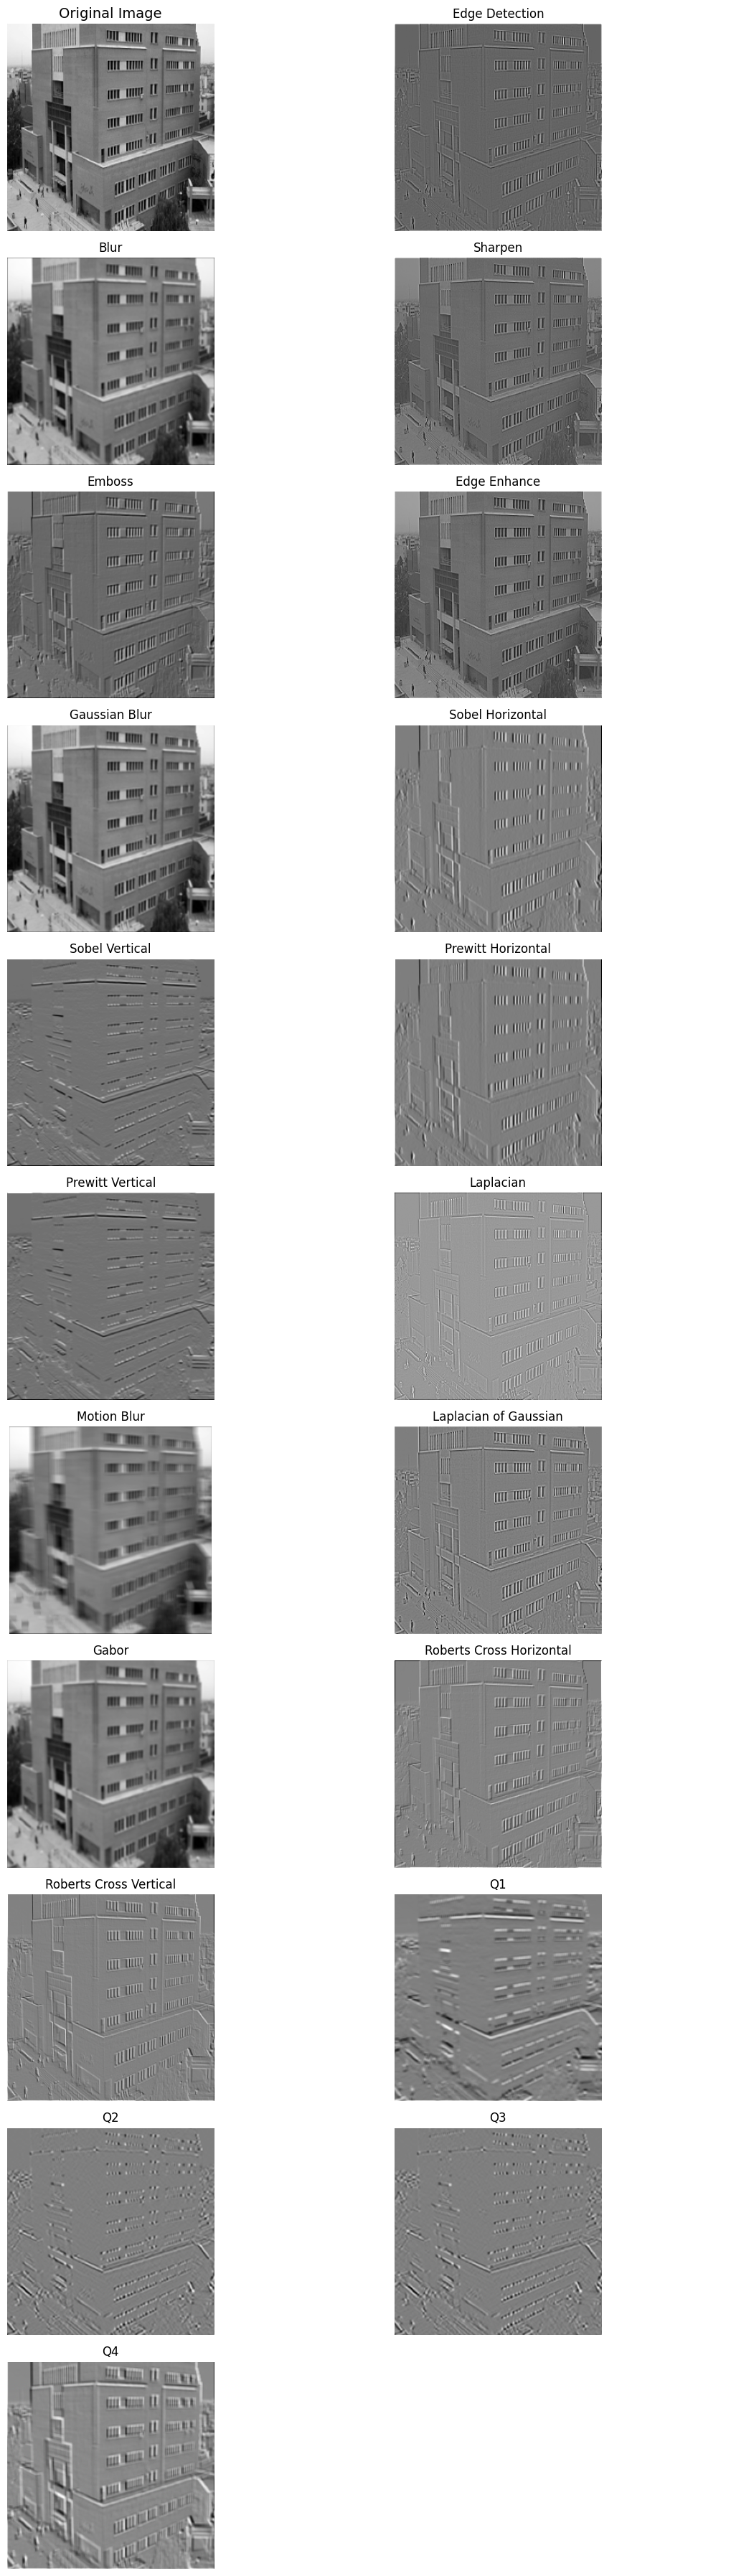

In [50]:
    image_path = 'computer.jpg'  #This is The path to your image you can Replace with your image
    image = load_and_preprocess_image(image_path)

    # Define kernels

    kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  # 3x3 motion blur
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
    "Q1": np.array([[2, 2, 4, 2, 2], [1, 1, 2, 1, 1], [0, 0, 0, 0, 0], [-1, -1, -2, -1, -1], [-2, -2, -4, -2, -2]]),
    "Q2": np.array([[1, 1, 0, -1, -1], [1, 1, 0, -1, -1], [0, 0, 0, 0, 0], [-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1]]),
    "Q3": np.array([[1, 1, 0, -1, -1], [1, 1, 0, -1, -1], [0, 0, 0, 0, 0], [-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1]]),
    "Q4": np.array([[0, 1, 2, 3, 4], [-1, 0, 1, 2, 3], [-2, -1, 0, 1, 2], [-3, -2, -1, 0, 1], [-4, -3, -2, -1, 0]])
}

    convolved_images = []
    titles = []

    for title, kernel in kernels.items():
        convolved_img = convolve_2d_im2col(image, kernel, stride=1, pad=1)  # Adjust stride and pad as needed
        convolved_images.append(convolved_img)
        titles.append(title)

    display_images(image, convolved_images, titles)

### **Assignment Questions**

For each kernel Q1 provided, identify what type of feature or pattern the kernel is trying to detect in an image.

#### **1.Q1:**

**Answer:**

*Detects horizontal edges.*

---

#### **2.Q2:**

**Answer:**

*Detects vertical edges.*

---

#### **3.Q3:**

**Answer:**

*Same as Q3*

---

#### **4.Q4:**

**Answer:**

*Detects all edges*

---



# HOG

In this this part we are to implement a model to detect objects in a photo using <b>Histogram of Oriented Gradients (HOG)</b>. First we go through the theory of HOG and explain how does it actually work.

HOG is much similar to applying Sobel filter to a photo using convolution, the only difference is that in HOG apart from applying convolution, we also calculate the direction of the values derived from convolution. In the image below you can see a picture before and after performing HOG.
<center>
<div style="max-width: 1000px">
<img src="hog.png">
</div>
</center>

HOG can be used to extract feature vectors from a matrix (picture). The first step of calculating HOG is applying the same Sobel using a $1\times 3$ kernel in two different directions with stride value set to 1.
$$Sobel_x = \begin{bmatrix}
-1 & 0 & 1
\end{bmatrix}$$
$$Sobel_y = \begin{bmatrix}
-1\\
0\\
1
\end{bmatrix}$$
Before applying the convolution we should add padding to our image so that it won't shrink after performing the convolution. You can perform any methods you like for this purpose, padding the image with zeros is one of the most used methods. After performing the convolution we get two matrices as below:
$$grad_x: \text{x direction of gradient}$$
$$grad_y: \text{y direction of gradient}$$
We can calculate the orientation and magnitude of gradient at a random point $(i,j)$ using the formulas below:
$$\text{orientation } =\arctan{(\frac{grad_y[i][j]}{grad_x[i][j]})} \cdot \frac {180}{\pi}$$
$$\text{magnitude } =\sqrt{grad_y[i][j]^2 + grad_x[i][j]^2}$$
Note that we keep the orientation in the interval $[0,180)$.

Next step involves dividing the picture into some cells. this has a huge impact on complexity of features (more simplified and robust features) and boosts runtime complexity. we divide the picture into cells (e.g. $8\times 8$ cells) and then create a histogram of the gradients in each cells. for convenience we map the orientations into discrete bins. Let's say we have $\text{nbins}$ number of bins. for example if $\text{nbins}=4$ then the angles in each $45^\circ$ intervals are mapped to the same bin.(Note that in a bin we consider all angles to have the value of the first endpoint of interval, so keep in mind that you should avoid choosing low values of $\text{nbins}$). Then for each cell, we draw the histogram of gradients using the angles as bins.

$$\text{dim(histogram) = (\#cells per column,\#cell per row,nbins)}$$

Next step is block normalization. we divide the histogram tensor into some blocks (e.g. $2\times 2$ blocks). After that we normalize the histograms in each block. Normalizing the histograms helps ensure that the descriptor is robust to changes in lighting and contrast, and the epsilon prevents division by zero. After that we flatten this block and add it to the hog_features list.

In order to visualize the hog_features, draw each value of histogram as a line with the correct angle, centered at the middle of the cell. In order to have a more realistic representation you can set the opacity of the gradients based on their magnitudes.

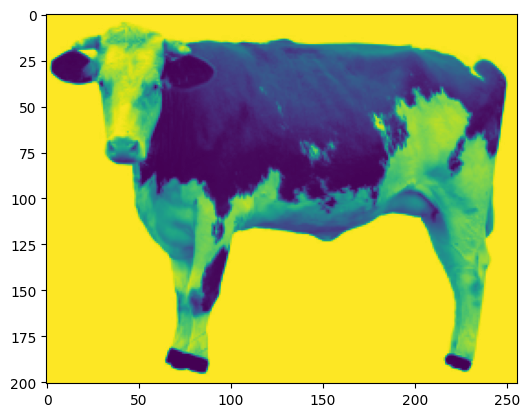

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure
import imutils

template_image = color.rgb2gray(cv2.imread('template.jpg'))
template_image = imutils.resize(template_image,width=256)
plt.imshow(template_image)
plt.show()

In [52]:
#Tunable parameters
sobel = np.array([[-1, 0, 1]])
cell_size = 6
nbins = 9
block_size = 2

# Function to apply convolution manually
def convolve(image, kernel):
    # Get image dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize output image
    output = np.zeros((image_height, image_width))

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Apply the kernel to the current region of the image
            output[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)
    return output


In [72]:
def hog_feature_extraction(image, sobel, cell_size, nbins, block_size):
    #don't forget to normalize the orientation in the interval
    grad_x = convolve(image, sobel)
    grad_y = convolve(image, sobel.T)

    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    orientation = np.arctan2(grad_y, grad_x) * (180 / np.pi)
    orientation = np.mod(orientation, 180)
    cells_per_row = image.shape[1] // cell_size
    cells_per_col = image.shape[0] // cell_size
    histograms = np.zeros((cells_per_col, cells_per_row, nbins))

    bin_size = 180 // nbins

    # Step 3: Vectorized histogram calculation
    for i in range(cells_per_col):
        for j in range(cells_per_row):
            # Extract cell gradients
            cell_magnitude = magnitude[i * cell_size:(i + 1) * cell_size, j * cell_size:(j + 1) * cell_size]
            cell_orientation = orientation[i * cell_size:(i + 1) * cell_size, j * cell_size:(j + 1) * cell_size]

            # Compute histogram for the cell
            cell_histogram = np.zeros(nbins)
            for m in range(cell_size):
                for n in range(cell_size):
                    bin_idx = int(cell_orientation[m, n] // bin_size)
                    cell_histogram[bin_idx] += cell_magnitude[m, n]

            histograms[i, j] = cell_histogram

    # Step 4: Block normalization
    blocks_per_row = cells_per_row - block_size + 1
    blocks_per_col = cells_per_col - block_size + 1
    hog_features = []

    for i in range(blocks_per_col):
        for j in range(blocks_per_row):
            # Concatenate histograms from block
            block_histogram = histograms[i:i + block_size, j:j + block_size].ravel()
            # Normalize the block histogram (consider division by zero)
            norm = np.linalg.norm(block_histogram) + 1e-6
            normalized_block = block_histogram / norm
            hog_features.append(normalized_block)

    #concatenate the hog_features
    hog_features = np.concatenate(hog_features)

    return histograms, hog_features

template_histograms , template_hog_features = hog_feature_extraction(template_image,sobel,cell_size,nbins,block_size)

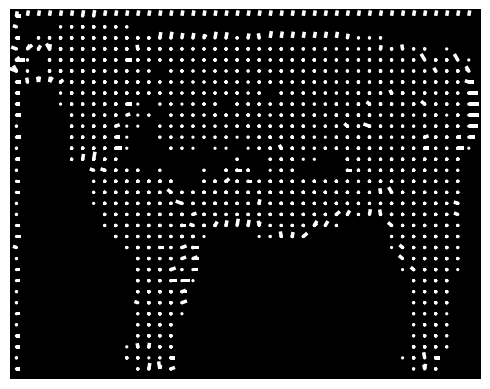

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_hog(image, histograms, cell_size, nbins):
    # Create an image to overlay arrows
    hog_image = np.zeros_like(image, dtype=np.float32)
    angles = np.linspace(0, 180, nbins, endpoint=False) # Angle for each bin

    fig, ax = plt.subplots()
    ax.imshow(hog_image, cmap='gray')
    scale_factor = 0.5

    magnitude_threshold = 0.1
    # Iterate through each cell and plot gradient directions as arrows
    for i in range(histograms.shape[0]):
        for j in range(histograms.shape[1]):
            cell_hist = histograms[i, j]
            center_y = i * cell_size + cell_size / 2
            center_x = j * cell_size + cell_size / 2

            for bin_idx, magnitude in enumerate(cell_hist):
                if magnitude > magnitude_threshold:
                    angle = angles[bin_idx]
                    angle_rad = np.deg2rad(angle)
                    # Compute arrow direction and magnitude
                    dx = np.cos(angle_rad) *magnitude * scale_factor
                    dy = np.sin(angle_rad) *magnitude * scale_factor
                    # Display the image with arrows
                    ax.quiver(center_x, center_y, dx, -dy, color='white', scale=1, scale_units='xy', angles='xy', headwidth=0, headlength=0, headaxislength=0)
    # Plot arrow on hog_image
    ax.axis('off')
    plt.show()

visualize_hog(template_image, template_histograms, cell_size, nbins)


# Object Detection using HOG
We can use HOG to extract features from a photo and then using the HOG of a template photo that we have from before, perform the object detection.

## HOG pyramid
In order to make the model invariant to changes in the object size we make use of HOG pyramid. In this process we make a list of template HOG using different scales of the template.

## Steps for Object Detection using HOG and Sliding Window
#### Template HOG Feature Extraction:
- Extract the HOG features of the template image (your human template) that you will use for comparison.
#### Sliding Window:
- Apply a sliding window over the target image at multiple scales. This window will move over the image, capturing different regions for comparison with the template.
- Each window size should match the dimensions of your template image, and you'll need to scan through the target image using a small step size (stride).
#### Image Pyramid:
- To account for objects at different scales in the target image, you will create an image pyramid.
- At each level of the pyramid, the image is resized (scaled down), allowing the sliding window to scan objects at various sizes.
#### HOG Feature Extraction for Each Window:
- For each window (at each scale), extract HOG features and compare them with the pre-extracted HOG features of the template image.
#### Comparison and Scoring:
- Compute a similarity score (e.g., using dot products or distance metrics like Euclidean distance) between the HOG features of the template and the sliding window.
- If the score exceeds a certain threshold, you can consider the object detected at that location and scale.
#### Choose the detection with maximum score:
- As the sliding window may detect the same object multiple times (at overlapping positions and scales), you should filter out redundant detections and keep the best one.

In [74]:
import imutils

# Defining the pyramid
def pyramid(image, scale=1.5, minSize=(30, 30)):
    yield image

    while True:
        #create image with different scales
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        yield image

In [75]:
# Defining the sliding window
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
           yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

In [77]:
#Tune the parameters
step_size = 16
scale = 1.5
threshold = 0.4
# Detection function
def detect_objects(image, template_hog, template_size, step_size=4, scale=1.5, threshold=0.5):
    detections = []
    for resized in pyramid(image, scale=scale):
        plt.imshow(resized)
        ax = plt.gca()
        draw = False
        for (x, y, window) in sliding_window(resized, step_size=step_size, window_size=template_size):
            _ , window_hog = None
            score = None
            if score > threshold:
                #append the x , y , score , and resized.shape to detections
                #draw a rectangle to indicate the detected area
                #TO-DO
                draw = True
        if draw:
            plt.show()

    return detections

In [79]:
target_image = color.rgb2gray(cv2.imread('target.jpg'))
target_image = imutils.resize(target_image,width=400)
#TO-DO
detections = None


KeyboardInterrupt: 

In [ ]:
#Find the best window for detection and plot it
#TO-DO
best_window = None


In [ ]:
target_image = color.rgb2gray(cv2.imread('target2.jpg'))
target_image = imutils.resize(target_image,width=400)
detections = None


In [ ]:
#Find the best window for detection and plot it
#TO-DO
best_window = None
